In [1]:
##
import os
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] =  False

In [2]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving PRSA_Data_Gucheng_20130301-20170228.csv to PRSA_Data_Gucheng_20130301-20170228.csv
Saving PRSA_Data_Shunyi_20130301-20170228.csv to PRSA_Data_Shunyi_20130301-20170228.csv
Saving PRSA_Data_Wanliu_20130301-20170228.csv to PRSA_Data_Wanliu_20130301-20170228.csv


In [3]:
##
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [4]:
#
aq_df_sh = pd.read_csv('PRSA_Data_Shunyi_20130301-20170228.csv', parse_dates=[['year', 'month', 'day', 'hour']], date_parser=convert_to_date)
aq_df_wa = pd.read_csv('PRSA_Data_Wanliu_20130301-20170228.csv', parse_dates=[['year', 'month', 'day', 'hour']], date_parser=convert_to_date)
aq_df_gu = pd.read_csv('PRSA_Data_Gucheng_20130301-20170228.csv', parse_dates=[['year', 'month', 'day', 'hour']], date_parser=convert_to_date)

In [5]:
## 
aq_df = pd.concat([aq_df_sh, aq_df_wa, aq_df_gu], ignore_index=True, sort=False)
aq_df

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,2,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,3,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,4,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,5,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,2017-02-28 19:00:00,35060,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
105188,2017-02-28 20:00:00,35061,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
105189,2017-02-28 21:00:00,35062,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
105190,2017-02-28 22:00:00,35063,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng


In [6]:
## Drop 'No' column
aq_df = aq_df.drop(['No'], axis=1)
aq_df.head()

,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [7]:
## Set index
aq_df = aq_df.set_index('year_month_day_hour').groupby('station').resample('D').mean()

In [8]:
# aq_df

In [9]:
## Reset index
aq_df = aq_df.reset_index()

In [10]:
# aq_df

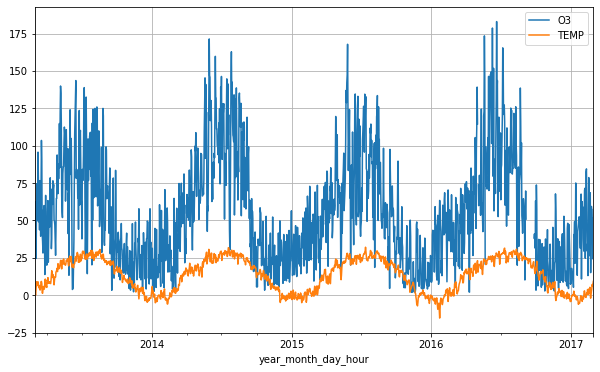

In [11]:
aq_df.set_index('year_month_day_hour').query("station == 'Shunyi'")[['O3', 'TEMP']].plot(figsize=(10, 6), grid=True);

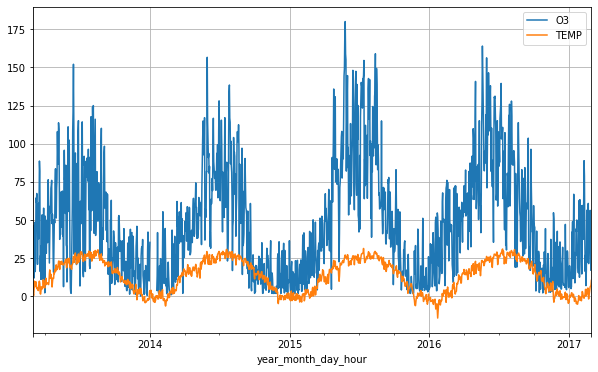

In [12]:
aq_df.set_index('year_month_day_hour').query("station == 'Wanliu'")[['O3', 'TEMP']].plot(figsize=(10, 6), grid=True);

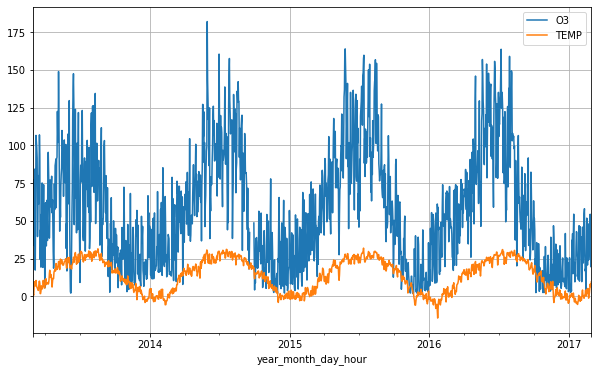

In [13]:
aq_df.set_index('year_month_day_hour').query("station == 'Gucheng'")[['O3', 'TEMP']].plot(figsize=(10, 6), grid=True);

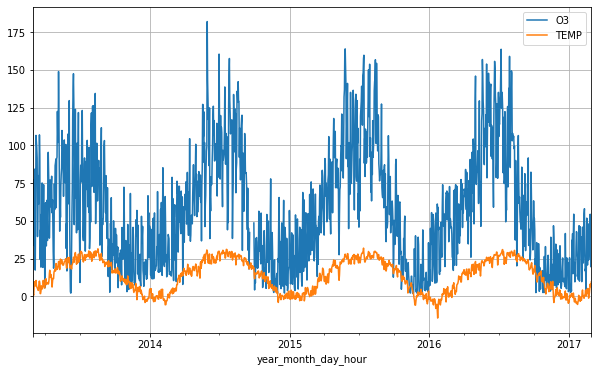

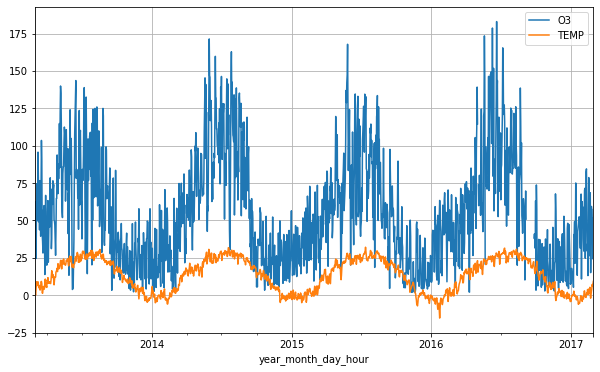

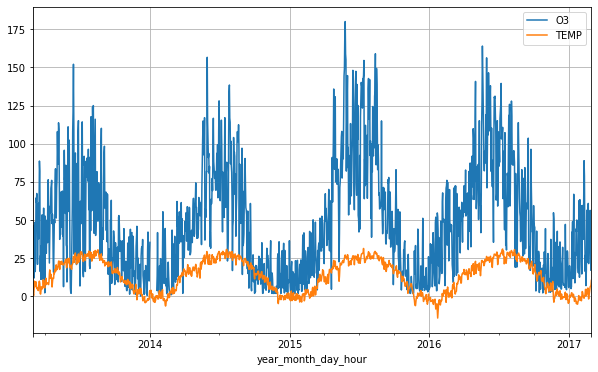

In [14]:
aq_df.set_index('year_month_day_hour').groupby("station")[['O3', 'TEMP']].plot(figsize=(10, 6), grid=True);

In [15]:
aq_df.head()

,station,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,Gucheng,2013-03-01,8.625000,16.875000,7.391304,14.250000,869.565217,77.130435,1.691667,1024.816667,-19.691667,0.0,2.350000
1,Gucheng,2013-03-02,36.916667,51.375000,37.291667,37.565217,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500
2,Gucheng,2013-03-03,80.333333,120.041667,47.541667,63.333333,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000
3,Gucheng,2013-03-04,26.500000,51.291667,18.666667,32.666667,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667
4,Gucheng,2013-03-05,136.708333,172.541667,75.130435,73.500000,1381.545455,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667


In [16]:
## check all station
aq_df['station'].unique()

array(['Gucheng', 'Shunyi', 'Wanliu'], dtype=object)

In [17]:
from fbprophet import Prophet

In [18]:
aq_df_final = aq_df[['year_month_day_hour', 'O3', 'TEMP', 'station']].rename({'year_month_day_hour':'ds', 'O3':'y'}, axis='columns')
aq_df_final.head(2)

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng


In [19]:
##
stations = aq_df_final.groupby('station')
stations.head()

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
1461,2013-03-01,62.478261,0.541667,Shunyi
1462,2013-03-02,40.416667,0.083333,Shunyi
1463,2013-03-03,24.541667,5.029167,Shunyi
1464,2013-03-04,55.125000,8.937500,Shunyi
1465,2013-03-05,74.541667,6.450000,Shunyi


In [20]:
stations.groups


{'Gucheng': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460],
            dtype='int64', length=1461),
 'Shunyi': Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
             ...
             2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2920, 2921],
            dtype='int64', length=1461),
 'Wanliu': Int64Index([2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931,
             ...
             4373, 4374, 4375, 4376, 4377, 4378, 4379, 4380, 4381, 4382],
            dtype='int64', length=1461)}

In [21]:
stations.get_group('Gucheng').head()

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng


In [22]:
for station in stations.groups:
    group = stations.get_group(station)
    train = group[(group['ds'] >= '2013-03-01') & (group['ds'] <= '2016-02-28')]
    test = group[(group['ds'] > '2016-02-28')]
    print(test.shape)

(366, 4)
(366, 4)
(366, 4)


In [23]:
target = pd.DataFrame()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


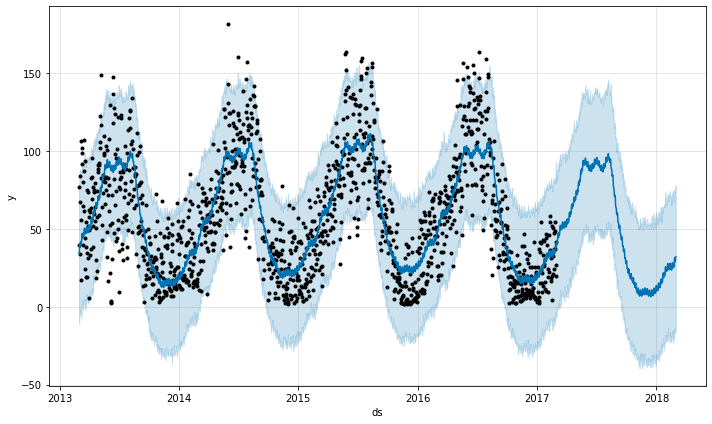

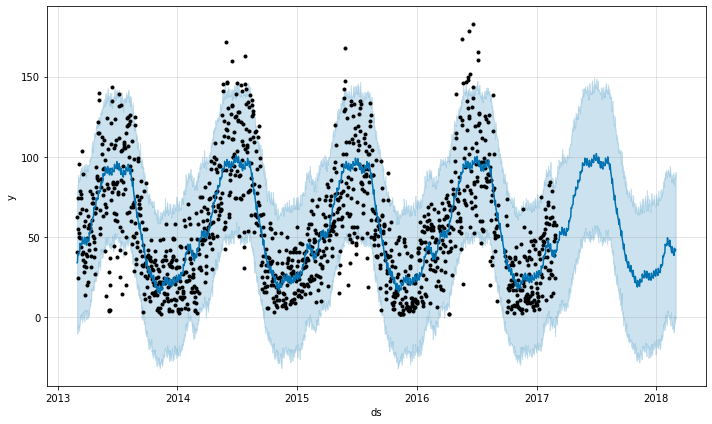

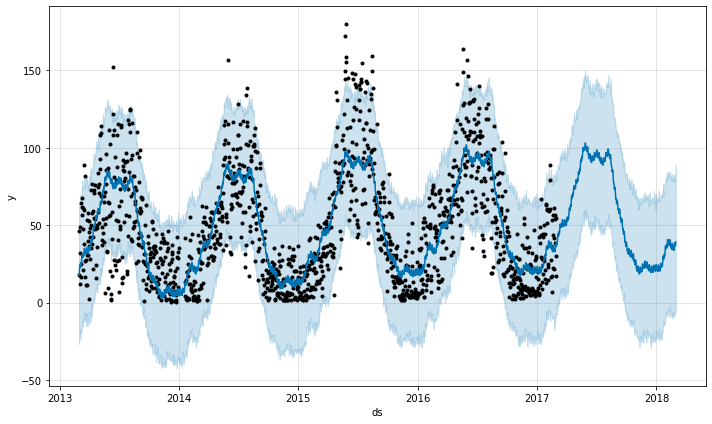

In [24]:
##
for station in stations.groups:
    group = stations.get_group(station)

    m = Prophet(interval_width=0.95)
    m.fit(group)
    future = m.make_future_dataframe(periods=366)
    forecast = m.predict(future)
    m.plot(forecast)
    forecast = forecast.rename(columns={'yhat':'yhat_'+station})
    target = pd.merge(target, forecast.set_index('ds'), how='outer', left_index=True, right_index=True)

In [25]:
target.head()

,trend_x,yhat_lower_x,yhat_upper_x,trend_lower_x,trend_upper_x,additive_terms_x,additive_terms_lower_x,additive_terms_upper_x,weekly_x,weekly_lower_x,weekly_upper_x,yearly_x,yearly_lower_x,yearly_upper_x,multiplicative_terms_x,multiplicative_terms_lower_x,multiplicative_terms_upper_x,yhat_Gucheng,trend_y,yhat_lower_y,yhat_upper_y,trend_lower_y,trend_upper_y,additive_terms_y,additive_terms_lower_y,additive_terms_upper_y,weekly_y,weekly_lower_y,weekly_upper_y,yearly_y,yearly_lower_y,yearly_upper_y,multiplicative_terms_y,multiplicative_terms_lower_y,multiplicative_terms_upper_y,yhat_Shunyi,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat_Wanliu
ds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01,49.084059,-10.804348,77.344863,49.084059,49.084059,-15.179868,-15.179868,-15.179868,-1.940995,-1.940995,-1.940995,-13.238873,-13.238873,-13.238873,0.0,0.0,0.0,33.904191,51.043807,-9.558338,77.470573,51.043807,51.043807,-17.147816,-17.147816,-17.147816,-1.301577,-1.301577,-1.301577,-15.846240,-15.846240,-15.846240,0.0,0.0,0.0,33.895991,37.010620,-26.533942,62.163736,37.010620,37.010620,-19.299212,-19.299212,-19.299212,-1.925011,-1.925011,-1.925011,-17.374201,-17.374201,-17.374201,0.0,0.0,0.0,17.711409
2013-03-02,49.099025,-7.983928,80.426988,49.099025,49.099025,-13.116501,-13.116501,-13.116501,-0.800782,-0.800782,-0.800782,-12.315719,-12.315719,-12.315719,0.0,0.0,0.0,35.982524,51.055284,-10.342045,80.738758,51.055284,51.055284,-16.824081,-16.824081,-16.824081,-1.746628,-1.746628,-1.746628,-15.077453,-15.077453,-15.077453,0.0,0.0,0.0,34.231202,37.022769,-21.981623,64.143242,37.022769,37.022769,-16.969811,-16.969811,-16.969811,-0.469608,-0.469608,-0.469608,-16.500203,-16.500203,-16.500203,0.0,0.0,0.0,20.052958
2013-03-03,49.113990,-2.869070,87.991717,49.113990,49.113990,-9.354453,-9.354453,-9.354453,2.014621,2.014621,2.014621,-11.369073,-11.369073,-11.369073,0.0,0.0,0.0,39.759538,51.066760,-5.944709,82.753363,51.066760,51.066760,-11.674611,-11.674611,-11.674611,2.562108,2.562108,2.562108,-14.236719,-14.236719,-14.236719,0.0,0.0,0.0,39.392149,37.034918,-19.131712,65.151632,37.034918,37.034918,-13.157718,-13.157718,-13.157718,2.407774,2.407774,2.407774,-15.565492,-15.565492,-15.565492,0.0,0.0,0.0,23.877200
2013-03-04,49.128956,-4.580848,88.604896,49.128956,49.128956,-8.105451,-8.105451,-8.105451,2.304802,2.304802,2.304802,-10.410253,-10.410253,-10.410253,0.0,0.0,0.0,41.023505,51.078237,-6.079550,88.799774,51.078237,51.078237,-12.216837,-12.216837,-12.216837,1.122989,1.122989,1.122989,-13.339827,-13.339827,-13.339827,0.0,0.0,0.0,38.861399,37.047066,-20.023388,69.423858,37.047066,37.047066,-12.654523,-12.654523,-12.654523,1.930802,1.930802,1.930802,-14.585325,-14.585325,-14.585325,0.0,0.0,0.0,24.392543
2013-03-05,49.143922,-4.248896,83.214442,49.143922,49.143922,-10.736008,-10.736008,-10.736008,-1.285152,-1.285152,-1.285152,-9.450856,-9.450856,-9.450856,0.0,0.0,0.0,38.407914,51.089713,-7.110461,84.556224,51.089713,51.089713,-12.578902,-12.578902,-12.578902,-0.175208,-0.175208,-0.175208,-12.403695,-12.403695,-12.403695,0.0,0.0,0.0,38.510811,37.059215,-23.733717,69.038236,37.059215,37.059215,-14.516528,-14.516528,-14.516528,-0.940577,-0.940577,-0.940577,-13.575952,-13.575952,-13.575952,0.0,0.0,0.0,22.542686


In [26]:
## check
stations.groups.keys()

dict_keys(['Gucheng', 'Shunyi', 'Wanliu'])

In [27]:
##
target = target[['yhat_' + station for station in stations.groups.keys()]]

In [28]:
target.head(10)

,yhat_Gucheng,yhat_Shunyi,yhat_Wanliu
ds,,,
2013-03-01,33.904191,33.895991,17.711409
2013-03-02,35.982524,34.231202,20.052958
2013-03-03,39.759538,39.392149,23.877200
2013-03-04,41.023505,38.861399,24.392543
2013-03-05,38.407914,38.510811,22.542686
2013-03-06,39.878798,39.475311,23.214865
2013-03-07,42.082617,40.346601,25.845631
2013-03-08,40.564579,40.286080,24.630191
2013-03-09,42.570071,40.769756,27.057502


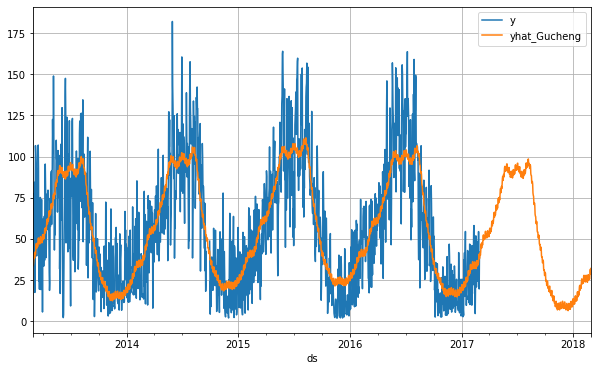

In [29]:
#
pd.concat([aq_df_final.set_index('ds').query("station=='Gucheng'")['y'], target['yhat_Gucheng']], axis=1).plot(figsize=(10, 6), grid=True);

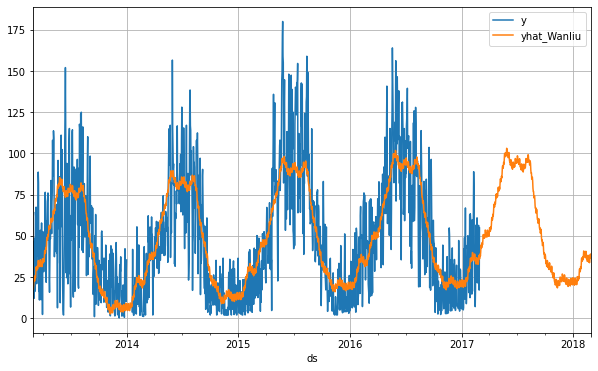

In [30]:
#
pd.concat([aq_df_final.set_index('ds').query("station=='Wanliu'")['y'], target['yhat_Wanliu']], axis=1).plot(figsize=(10, 6), grid=True);